In [1]:
################### #
# Attach packages ----
################### #

library(tidyverse)
library(tidymodels)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 0.1.2 ──

✔ broom     0.7.5      ✔ recipes   0.1.15
✔ dials     0.0.9      ✔ rsample   0.0.9 
✔ infer     0.5.4      ✔ tune      0.1.3 
✔ modeldata 0.1.0      ✔ workflows 0.2.2 
✔ parsnip   0.1.5      ✔ yardstick 0.0.8 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::

In [11]:

#################### #
# Import data ----
#################### #

houses_raw <- read_excel("temp/houses.xlsx")

In [12]:
head(houses_raw,3)

id,sqm,price,debt,expense,lat,lng,kommune_no,kommune_name,fylke_no,⋯,zip_no,zip_name,avg_income,avg_fortune,sqm_use,built,floor,tot_price,tot_price_per_sqm,n_houses_nearby
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10001,152,9800000,0,0,59.95475,10.76841,0301,Oslo,0300,⋯,0484,Oslo,428890,755524,190,1959,1,9800000,64473.68,110
10002,66,3100000,175086,5147,59.94381,10.81159,0301,Oslo,0300,⋯,0590,Oslo,421739,867066,66,1954,2,3275086,49622.52,101
10003,189,8400000,0,0,59.98290,11.01450,0231,Skedsmo,0200,⋯,2007,Kjeller,356058,645496,234,1987,3,8400000,44444.44,24


In [13]:
distinct_df = houses %>% distinct(kommune_name)
length(distinct_df$kommune_name)

[1] 226

In [21]:
#################### #
# Transform data ----
#################### #

houses <- houses_raw %>%
  select(sqm, expense, tot_price, lat, lng, kommune_name) %>%
  mutate(kommune_name = fct_lump_n(kommune_name, 220),
         log_sqm      = log(sqm))

In [22]:
head(houses,3)

sqm,expense,tot_price,lat,lng,kommune_name,log_sqm
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
152,0,9800000,59.95475,10.76841,Oslo,5.023881
66,5147,3275086,59.94381,10.81159,Oslo,4.189655
189,0,8400000,59.98290,11.01450,Skedsmo,5.241747


In [23]:
distinct_df = houses %>% distinct(kommune_name)
distinct_df$kommune_name

[1] Oslo               Skedsmo            Oppegård          
  [4] Bærum              Kristiansund       Haugesund         
  [7] Trondheim          Stavanger          Other             
 [10] Melhus             Rælingen           Moss              
 [13] Sande              Drammen            Sandefjord        
 [16] Røyken             Asker              Bergen            
 [19] Åsnes              Enebakk            Sørum             
 [22] Lørenskog          Molde              Vestby            
 [25] Re                 Bømlo              Bodø              
 [28] Randaberg          Ski                Fredrikstad       
 [31] Nittedal           Hammerfest         Lindås            
 [34] Harstad - Hárstták Sola               Sogndal           
 [37] Målselv            Karmøy             Skodje            
 [40] Arendal            Tromsø             Rygge             
 [43] Frogn              Hamar              Nes               
 [46] Fjell              Ullensaker         Ås                
 [49] Horten             Tønsberg           Gran              
 [52] Sandnes            Eidsvoll           Porsgrunn         
 [55] Hobøl              Nannestad          Ørsta             
 [58] Aurskog-Høland     Nesodden           Gjerdrum          
 [61] Stange             Larvik             Gjøvik            
 [64] Froland            Øygarden           Ringerike         
 [67] Stord              Sarpsborg          Frøya             
 [70] Gjesdal            Lier               Fet               
 [73] Trøgstad           Skien              Øvre Eiker        
 [76] Ålesund            Kongsvinger        Kristiansand      
 [79] Notodden           Lillehammer        Askøy             
 [82] Time               Midtre Gauldal     Kragerø           
 [85] Herøy              Ulstein            Indre Fosen       
 [88] Klepp              Narvik             Os                
 [91] Østre Toten        Bamble             Bjerkreim         
 [94] Vefsn              Søgne              Elverum           
 [97] Kvinnherad         Brønnøy            Averøy            
[100] Ringsaker          Verdal             Hå                
[103] Lillesand          Gol                Namsos            
[106] Stjørdal           Songdalen          Skaun             
[109] Levanger           Etne               Halden            
[112] Ørland             Hadsel             Lenvik            
[115] Grimstad           Alstahaug          Birkenes          
[118] Flora              Førde              Finnøy            
[121] Mandal             Askim              Spydeberg         
[124] Holmestrand        Eigersund          Lunner            
[127] Sula               Gausdal            Haram             
[130] Strand             Nedre Eiker        Malvik            
[133] Orkdal             Kongsberg          Meldal            
[136] Meland             Lindesnes          Alta              
[139] Flekkefjord        Våler              Nesna             
[142] Lund               Årdal              Rakkestad         
[145] Tysvær             Vadsø              Jevnaker          
[148] Aukra              Stranda            Radøy             
[151] Selbu              Bardu              Bjugn             
[154] Vågan              Åmot               Vennesla          
[157] Sveio              Sør-Varanger       Tynset            
[160] Risør              Rana               Øksnes            
[163] Vindafjord         Sund               Rauma             
[166] Sunndal            Modum              Sokndal           
[169] Odda               Nordreisa          Oppdal            
[172] Hurum              Røros              Sør-Odal          
[175] Ål                 Nome               Sykkylven         
[178] Søndre Land        Steinkjer          Vestre Toten      
[181] Færder             Rennesøy           Farsund           
[184] Voss               Vestnes            Volda             
[187] Inderøy            Fræna              Hjelmeland        
[190] Sauda              Bø      

In [24]:
#################### #
# Split data ----
#################### #

set.seed(42)

split <- initial_split(houses, prop = 3/4)
train <- training(split)
test  <- testing(split)


In [25]:
#################### #
# Fit a linear model  ----
#################### #

linear_model <- linear_reg() %>% 
  set_engine("lm") %>% 
  fit(log(tot_price) ~ ., data = train)

# View summary of fit
summary(linear_model$fit)


Call:
stats::lm(formula = log(tot_price) ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.67753 -0.17794  0.00152  0.17895  1.71367 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     1.422e+01  3.449e-01  41.243  < 2e-16 ***
sqm                            -5.069e-04  3.521e-05 -14.399  < 2e-16 ***
expense                         6.822e-06  1.375e-06   4.962 7.07e-07 ***
lat                            -4.507e-02  5.808e-03  -7.761 9.00e-15 ***
lng                             5.201e-03  4.296e-03   1.211 0.226043    
kommune_nameAlta                5.320e-01  8.108e-02   6.561 5.51e-11 ***
kommune_nameAndøy              -6.062e-01  1.009e-01  -6.009 1.91e-09 ***
kommune_nameArendal            -2.891e-01  6.598e-02  -4.381 1.19e-05 ***
kommune_nameAsker               6.680e-01  6.853e-02   9.748  < 2e-16 ***
kommune_nameAskim              -4.762e-03  7.870e-02  -0.061 0.951749    
kommune

In [26]:
#################### #
# Use model for predictions  ----
#################### #

linear_model_preds <- 
  predict(linear_model, test) %>% 
  bind_cols(test) %>% 
  mutate(.pred = exp(.pred)) %>% 
  rename(estimate     = .pred, 
         truth        = tot_price) %>% 
  mutate(abs_dev      = abs(truth - estimate),
         abs_dev_perc = abs_dev/truth) %>% 
  select(estimate, truth, everything()) # See comment below

# `select(estimate, truth, everything())` is a trick to reorder the columns such that `estimate` and `truth` appears
# as the first two columns in the dataset. This was not requested of the students in the exercise.

In [28]:
head(linear_model_preds,3)

estimate,truth,sqm,expense,lat,lng,kommune_name,log_sqm,abs_dev,abs_dev_perc
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
4704616,3275086,66,5147,59.94381,10.81159,Oslo,4.189655,1429530.4,0.4364864
2868415,3035761,33,3559,59.94471,10.77751,Oslo,3.496508,167345.7,0.0551248
3674076,2350000,244,0,63.10960,7.72550,Kristiansund,5.497168,1324076.1,0.5634366


In [29]:
#################### #
# Evaluate model  ----
#################### #

mape(data = linear_model_preds, truth = truth, estimate = estimate)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
mape,standard,27.13198


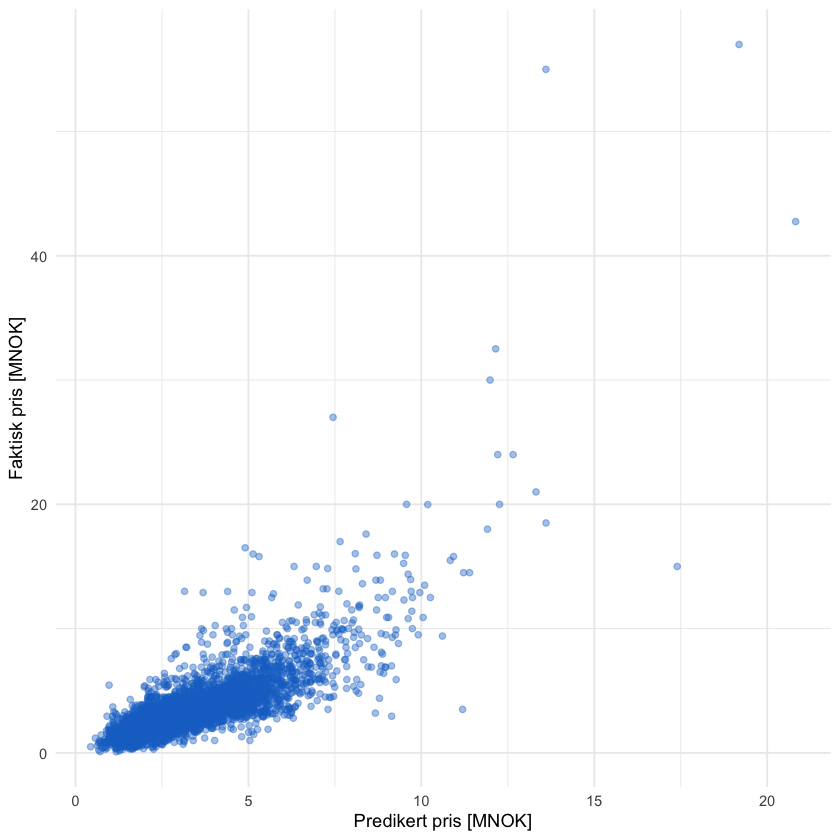

In [32]:
linear_model_preds %>% 
  ggplot(aes(x = estimate/1000000, y = truth/1000000)) +
  geom_point(color = "dodgerblue3", alpha = 0.4) +
  labs(x = "Predikert pris [MNOK]",
       y = "Faktisk pris [MNOK]") +
  theme_minimal()

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


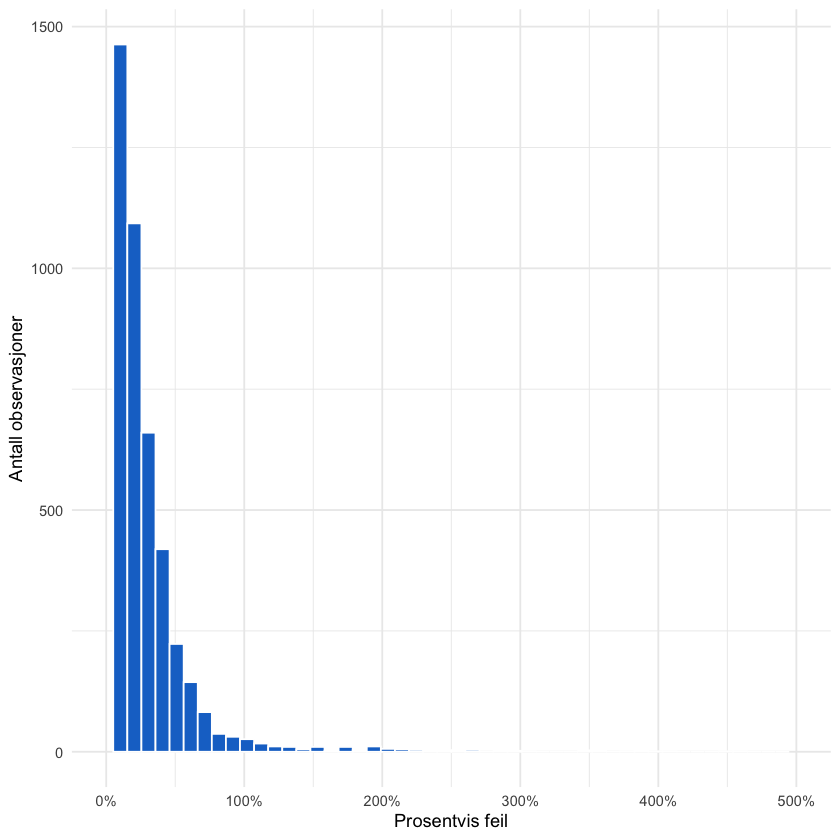

In [35]:
##################################### #
# Plot results ----
##################################### #

linear_model_preds %>%
  ggplot(aes(x = abs_dev_perc)) +
  geom_histogram(fill = "dodgerblue3", color = "white", bins=50) +
  labs(x = "Prosentvis feil",
       y = "Antall observasjoner") +
  scale_x_continuous(limits = c(0,5), labels = scales::percent) +   
  theme_minimal()